In [3]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#loading the datasets
messages = pd.read_csv('/content/drive/MyDrive/AI_generated_text_detector/Training_Essay_Data.csv')

In [6]:
#checking for head of the datasets
messages.head(5)

,text,generated
0,Car-free cities have become a subject of incre...,1
1,"Car Free Cities Car-free cities, a concept ga...",1
2,A Sustainable Urban Future Car-free cities ...,1
3,Pioneering Sustainable Urban Living In an e...,1
4,The Path to Sustainable Urban Living In an ...,1


In [7]:
#checking info of datasets
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29145 entries, 0 to 29144
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       29145 non-null  object
 1   generated  29145 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 455.5+ KB


In [8]:
#checking for null values
messages.isnull().sum()

#there are no null values in both columns

text         0
generated    0
dtype: int64

[Text(0.5, 0, 'Essay Type'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Count Plot')]

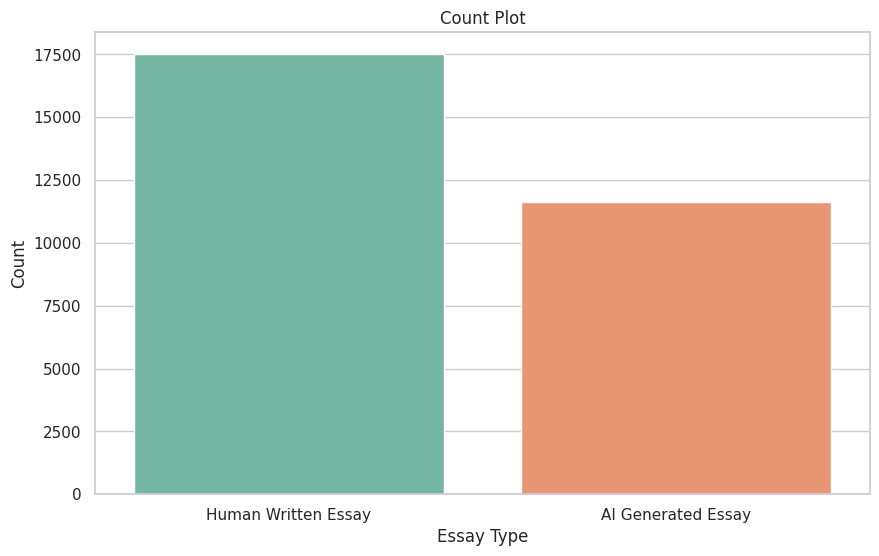

In [9]:
# Creating a Seaborn count plot with custom tick labels
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

ax = sns.countplot(x='generated', data=messages, palette="Set2")
ax.set_xticklabels(['Human Written Essay', 'AI Generated Essay'])

# Adding labels and title
ax.set(xlabel='Essay Type', ylabel='Count', title='Count Plot')

## DATA CLEANING

In [13]:
#Importing necessary data cleaning libraries
import re
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
import gensim
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
import nltk


[nltk_data] Downloading package wordnet to /root/nltk_data...


In [14]:
#setting up lemmatizer model
wl = WordNetLemmatizer()

In [15]:
#cleaning the datasets
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['text'][i])
    review = review.lower()
    review = review.split()
    review = [wl.lemmatize(word) for word in review]
    review = ' '.join(review)
    corpus.append(review)

In [16]:
#list of each essays
words = []
for sent in corpus:
  words.append(simple_preprocess(sent))


In [17]:
#training the list of essays using word2vec model
model = Word2Vec(words)

In [18]:
#to get all the vocabulary size
model.wv.index_to_key[0:50]

['the',
 'to',
 'and',
 'of',
 'in',
 'is',
 'that',
 'it',
 'for',
 'you',
 'be',
 'are',
 'can',
 'they',
 'people',
 'on',
 'have',
 'this',
 'car',
 'not',
 'or',
 'with',
 'more',
 'their',
 'we',
 'by',
 'if',
 'because',
 'but',
 'vote',
 'electoral',
 'there',
 'would',
 'one',
 'state',
 'college',
 'from',
 'will',
 'your',
 'when',
 'student',
 'ha',
 'also',
 'help',
 'all',
 'our',
 'make',
 'an',
 'what',
 'like']

In [19]:
#cheking for similar words to teenager
model.wv.similar_by_word('teenager')

[('teen', 0.8660606145858765),
 ('adult', 0.6613210439682007),
 ('curfew', 0.6141880750656128),
 ('kid', 0.6073858141899109),
 ('adolescent', 0.5865726470947266),
 ('driver', 0.5834680199623108),
 ('child', 0.5572702288627625),
 ('parent', 0.5535061359405518),
 ('people', 0.5297972559928894),
 ('youth', 0.5242600440979004)]

In [68]:
#Finding the Average word2vec for each essays
X = []
for i in range(len(words)):
    X.append(np.mean([model.wv[word] for word in words[i] if word in model.wv.index_to_key], axis = 0))

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [81]:
#independent feature
X_new = np.array(X)

<ipython-input-81-b0866823a6b6>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_new = np.array(X)


In [73]:
#target
y = messages['generated']

In [156]:
#converting independent feature to dataframe
X_new[1].reshape(1,-1)
df = pd.DataFrame()
for i in range(len(X_new)):
  df = df.append(pd.DataFrame(X_new[i].reshape(1,-1)))

Streaming output truncated to the last 5000 lines.
<ipython-input-156-cb088e29f4bb>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(X_new[i].reshape(1,-1)))
<ipython-input-156-cb088e29f4bb>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(X_new[i].reshape(1,-1)))
<ipython-input-156-cb088e29f4bb>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(X_new[i].reshape(1,-1)))
<ipython-input-156-cb088e29f4bb>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame(X_new[i].reshape(1,-1)))
<ipython-input-156-cb088e29f4bb>:5: FutureWarning: Th

In [157]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.018087,-0.603198,0.002356,-0.489430,-0.837173,0.053830,0.526207,-0.292443,-0.176693,0.596729,...,-0.491003,-0.185093,-0.017782,0.156052,-0.459543,-0.643229,-0.447304,0.107779,-0.306329,0.005041
0,-0.025612,-0.638460,0.122158,-0.483511,-0.852727,0.070600,0.547541,-0.390791,-0.119554,0.588484,...,-0.414883,-0.138496,-0.031860,0.171810,-0.411996,-0.710830,-0.494603,-0.000144,-0.319544,-0.015692
0,-0.097389,-0.645650,0.134494,-0.481784,-0.843385,0.133370,0.546304,-0.394919,-0.115295,0.656022,...,-0.427497,-0.110596,-0.036619,0.140753,-0.420280,-0.651246,-0.468818,0.015547,-0.287825,0.022200
0,-0.012677,-0.598393,0.027320,-0.467264,-0.852424,0.014014,0.500277,-0.296586,-0.149966,0.507453,...,-0.482750,-0.089329,0.012455,0.140286,-0.386469,-0.689723,-0.419242,-0.057619,-0.355619,0.022104
0,-0.003581,-0.611000,0.112536,-0.501788,-0.873078,-0.028195,0.474516,-0.333501,-0.194006,0.537756,...,-0.463083,-0.080585,-0.058193,0.155905,-0.429701,-0.713148,-0.445887,-0.056663,-0.228866,0.022452


In [158]:
#reseting index in the independent features
df = df.reset_index(drop = True)

In [159]:
#adding target column to independent dataframe
df['target'] = y

In [161]:
#dropping nan values in dataset
df.dropna(inplace = True)

In [163]:
df.isnull().sum()

0         0
1         0
2         0
3         0
4         0
         ..
96        0
97        0
98        0
99        0
target    0
Length: 101, dtype: int64

In [164]:
#independent features
X = df.drop(['target'], axis =1)

#target
y = df['target']

In [166]:
#Spliting the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

## Model Training

In [105]:
#importing necessary libraries for model training
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [107]:
#random forest model
rfc = RandomForestClassifier()

In [167]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [168]:
#predicted values for test set
y_pred = rfc.predict(X_test)

In [169]:
#checking for model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {accuracy}')

Accuracy Score: 0.9811288385657917


In [170]:
#confusion matrix
print(confusion_matrix(y_test, y_pred))

[[3477   33]
 [  77 2242]]


## Saving my AI generated essays Detector Model

In [171]:
#importing joblib for saving model
import joblib

In [172]:
joblib.dump(rfc, 'AI_generated_essay_detector_model.pkl')

['AI_generated_essay_detector_model.pkl']

In [173]:
model_rfc = joblib.load('/content/AI_generated_essay_detector_model.pkl')

In [182]:
#testing my saved model
model_rfc.predict(pd.DataFrame(np.array(X_test.iloc[0,:]).reshape(1,-1)))

array([0])